    INFO : 2020-05-21 06:25:04,211 : start: calc_avg_score
    INFO : 2020-05-21 06:25:05,474 : score[  0]: 0.06999
    INFO : 2020-05-21 06:25:06,740 : score[  1]: 0.06743
    INFO : 2020-05-21 06:25:07,956 : score[  2]: 0.06827
    INFO : 2020-05-21 06:25:09,192 : score[  3]: 0.06874
    INFO : 2020-05-21 06:25:10,876 : score[  4]: 0.07060
    INFO : 2020-05-21 06:25:12,022 : score[  5]: 0.06770
    INFO : 2020-05-21 06:25:13,177 : score[  6]: 0.06846
    INFO : 2020-05-21 06:25:14,352 : score[  7]: 0.06700
    INFO : 2020-05-21 06:25:15,441 : score[  8]: 0.07291
    INFO : 2020-05-21 06:25:16,518 : score[  9]: 0.06723
    INFO : 2020-05-21 06:25:17,611 : score[ 10]: 0.06815
    INFO : 2020-05-21 06:25:18,689 : score[ 11]: 0.06938
    INFO : 2020-05-21 06:25:19,763 : score[ 12]: 0.06924
    INFO : 2020-05-21 06:25:20,842 : score[ 13]: 0.06647
    INFO : 2020-05-21 06:25:21,906 : score[ 14]: 0.07041
    INFO : 2020-05-21 06:25:22,983 : score[ 15]: 0.07268
    INFO : 2020-05-21 06:25:2

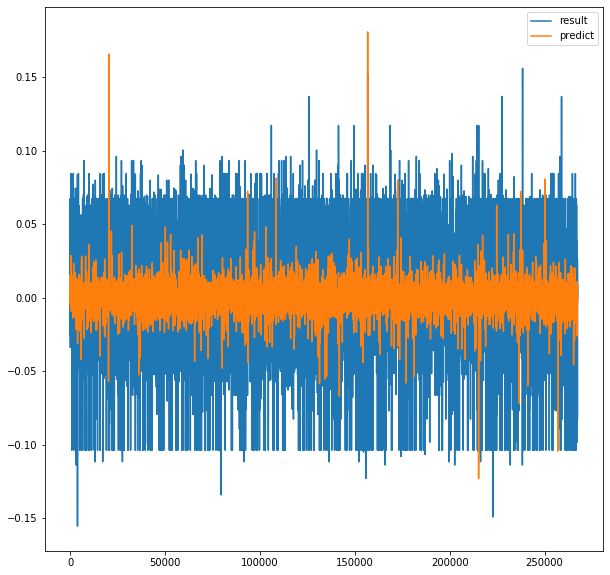

In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from mylib import bitcoin
%matplotlib inline

def plot(x, y_result, y_predict):
    _, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
    ax1.plot(list(range(len(x))), y_result, label='result')
    ax1.plot(list(range(len(x))), y_predict, label='predict')
    ax1.legend()
    plt.show()

def main():
    file_name = "v0.0.12-test"
    csv = pd.read_csv("datasets/" + file_name + ".csv")
    # 最後20%のデータでテスト
    test_start = int(len(csv) * 0.8)
    csv = csv[:test_start]

    bitcoin.calc_avg_score(csv)
    (
        data_train,
        data_test,
        label_train,
        label_test,
    ) = bitcoin.set_train_test_dataset(csv, 0.2)
    model = bitcoin.create_model(data_train, label_train)

    x = data_test#[-3500:]
    y_result = list(label_test)#[-3500:]
    y_predict = list(model.predict(x))
    plot(x, y_result, y_predict)

    with open("models/" + file_name + ".pickle", mode="wb") as file:
        pickle.dump(model, file)
    

if __name__ == "__main__":
    main()

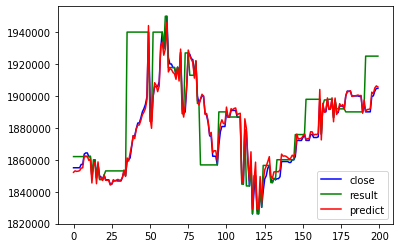

In [14]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from mylib import bitcoin
%matplotlib inline

file_name = "v0.0.12-test"
csv = pd.read_csv("datasets/" + file_name + ".csv")
with open("models/" + file_name + ".pickle", mode="rb") as file:
    model = pickle.load(file)

x = csv[406800:407000]
x.reset_index(drop=True, inplace=True)
y_close = list(x["close"])
y_extreme60 = list(np.exp(x["open_log"] + x["next_extreme_log"]))
p = list(model.predict(x[bitcoin.TRAIN_COLUMNS]))
pred = pd.DataFrame(p)
pred.columns = ["pred"]
y_predict = np.exp(pred["pred"] + x["open_log"])

#_, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
plt.plot(list(range(len(x))), y_close, color="blue", label='close')
plt.plot(list(range(len(x))), y_extreme60, color="green", label='result')
plt.plot(list(range(len(x))), y_predict, color="red", label='predict')
plt.legend()
plt.show()

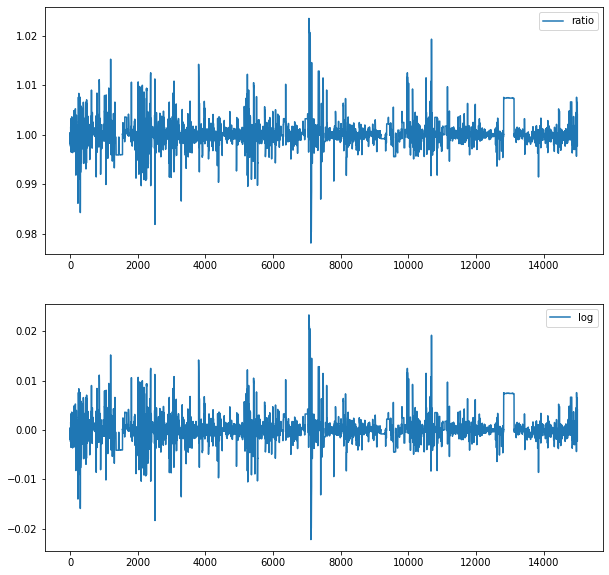

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from mylib import dataset
%matplotlib inline

csv = pd.read_csv("datasets/v0.0.12.csv")
data = csv[-15000:]
ratio = data['next_extreme']
log = data['next_extreme_log']

_, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
ax1.plot(list(range(len(ratio))), ratio, label='ratio')
ax1.legend()
ax2.plot(list(range(len(log))), log, label='log')
ax2.legend()
plt.show()